In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Load your dataset
data = {
    'Date': ['1/1/2025', '1/2/2025', '1/3/2025', '1/7/2025', '1/8/2025',
             '1/9/2025', '1/10/2025', '1/11/2025', '1/12/2025', '1/13/2025', '1/14/2025'],
    'Temperature': [8, 2.4, 9.3, 5.6, 3.4, 4, 7.1, 2.2, 6, 8, 3]
}

df = pd.DataFrame(data)

In [9]:
# Convert to datetime and handle date gaps
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').resample('D').asfreq()  # Fill missing dates with NaN
df['Temperature'] = df['Temperature'].ffill()  # Forward fill missing values

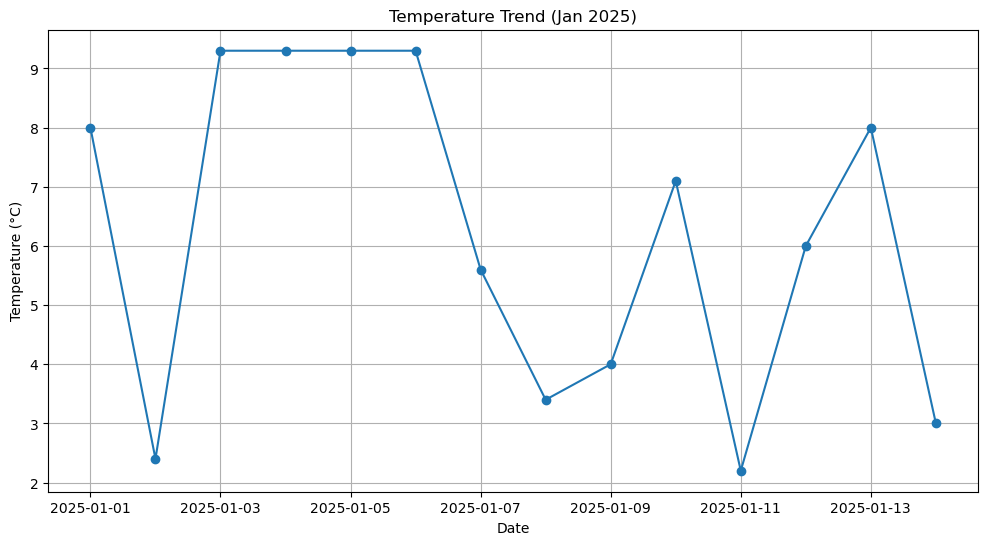

In [10]:
# Plot the temperature trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature'], marker='o')
plt.title('Temperature Trend (Jan 2025)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [11]:
# Forecasting functions
def naive_forecast(data, forecast_days=7):
    last_value = data[-1]
    return [last_value] * forecast_days

def moving_average(data, window=7, forecast_days=7):
    avg = data[-window:].mean()
    return [avg] * forecast_days

In [12]:
# Prepare data
temps = df['Temperature'].values

In [13]:
# Generate predictions
naive_preds = naive_forecast(temps)
ma_preds = moving_average(temps, window=3)  # Using 3-day window due to limited data

In [14]:
# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

In [15]:
# Create prediction dataframe
predictions = pd.DataFrame({
    'Date': future_dates,
    'Naive_Forecast': naive_preds,
    'Moving_Avg_Forecast': ma_preds
})

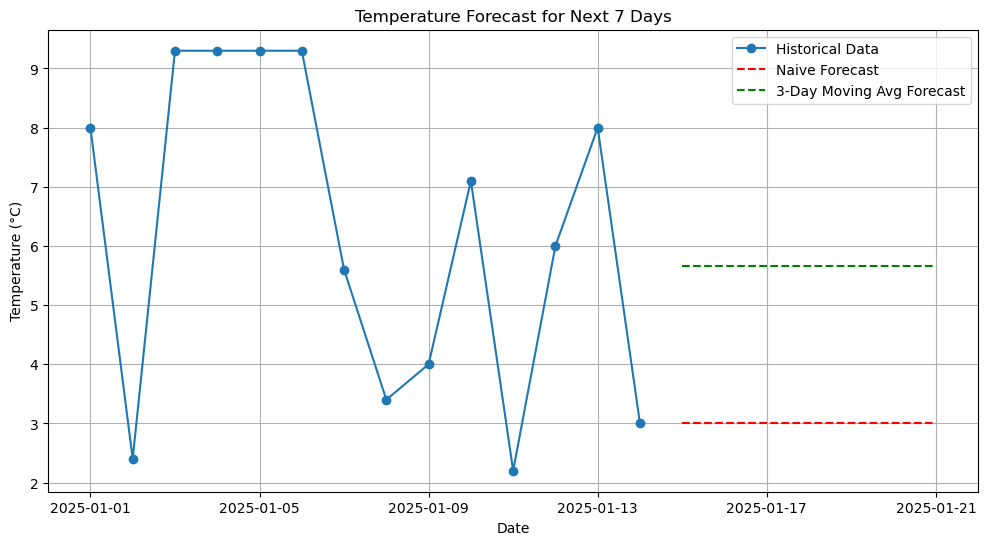

In [16]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature'], label='Historical Data', marker='o')
plt.plot(predictions['Date'], predictions['Naive_Forecast'], 'r--', label='Naive Forecast')
plt.plot(predictions['Date'], predictions['Moving_Avg_Forecast'], 'g--', label='3-Day Moving Avg Forecast')
plt.title('Temperature Forecast for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
print("Predictions for Next 7 Days:")
print(predictions)

Predictions for Next 7 Days:
        Date  Naive_Forecast  Moving_Avg_Forecast
0 2025-01-15             3.0             5.666667
1 2025-01-16             3.0             5.666667
2 2025-01-17             3.0             5.666667
3 2025-01-18             3.0             5.666667
4 2025-01-19             3.0             5.666667
5 2025-01-20             3.0             5.666667
6 2025-01-21             3.0             5.666667


In [19]:
# Calculate MAE for the last 3 days (adjust window as needed)
actual_last_3 = df['Temperature'].iloc[-3:].values
naive_mae = mean_absolute_error(actual_last_3, [df['Temperature'].iloc[-4]] * 3)
ma_mae = mean_absolute_error(actual_last_3, [df['Temperature'].iloc[-4:-1].mean()] * 3)
print(f"Naïve MAE (Last 3 Days): {naive_mae:.2f}")
print(f"Moving Avg MAE (Last 3 Days): {ma_mae:.2f}")

Naïve MAE (Last 3 Days): 3.47
Moving Avg MAE (Last 3 Days): 1.87


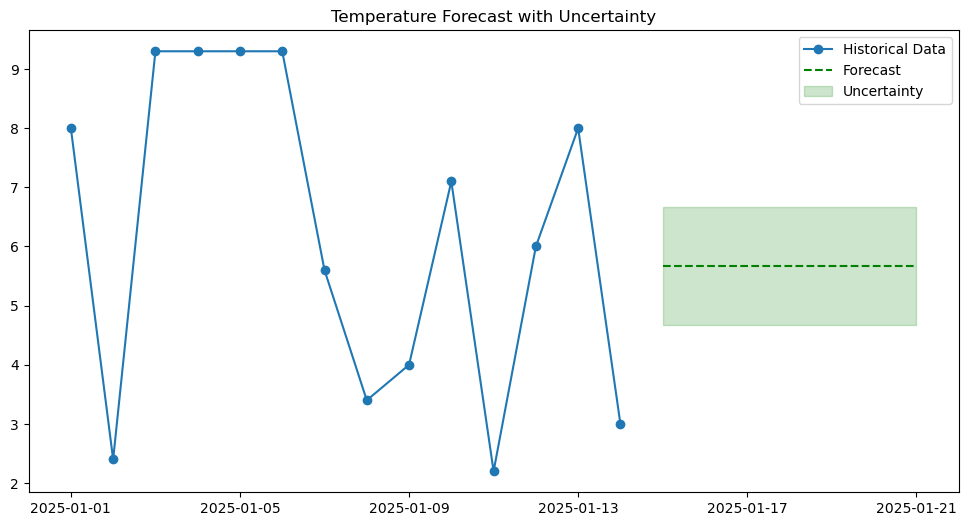

In [20]:
# Advanced Visualization 
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature'], label='Historical Data', marker='o')
plt.plot(predictions['Date'], predictions['Moving_Avg_Forecast'], 'g--', label='Forecast')
plt.fill_between(predictions['Date'], 
                 predictions['Moving_Avg_Forecast'] - 1, 
                 predictions['Moving_Avg_Forecast'] + 1, 
                 color='green', alpha=0.2, label='Uncertainty')
plt.title('Temperature Forecast with Uncertainty')
plt.legend()
plt.show()

In [21]:
# Exponential Smoothing
def exponential_smoothing(data, alpha=0.3, forecast_days=7):
    smoothed = [data[0]]
    for temp in data[1:]:
        smoothed.append(alpha * temp + (1 - alpha) * smoothed[-1])
    return [smoothed[-1]] * forecast_days

# Generate predictions
es_preds = exponential_smoothing(temps, alpha=0.5)
predictions['Exp_Smoothing'] = es_preds

In [22]:
# Export results
predictions.to_csv('temperature_predictions.csv', index=False)

In [26]:
print(predictions.to_csv)

<bound method NDFrame.to_csv of         Date  Naive_Forecast  Moving_Avg_Forecast  Exp_Smoothing
0 2025-01-15             3.0             5.666667        4.75564
1 2025-01-16             3.0             5.666667        4.75564
2 2025-01-17             3.0             5.666667        4.75564
3 2025-01-18             3.0             5.666667        4.75564
4 2025-01-19             3.0             5.666667        4.75564
5 2025-01-20             3.0             5.666667        4.75564
6 2025-01-21             3.0             5.666667        4.75564>
